<h1><center>Homework 2</center></h1>

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

## EDA


In [3]:
df.shape

(20640, 10)

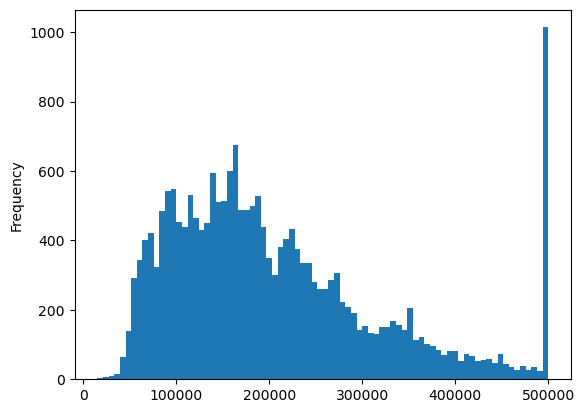

In [4]:
df.median_house_value.plot.hist(bins=80);

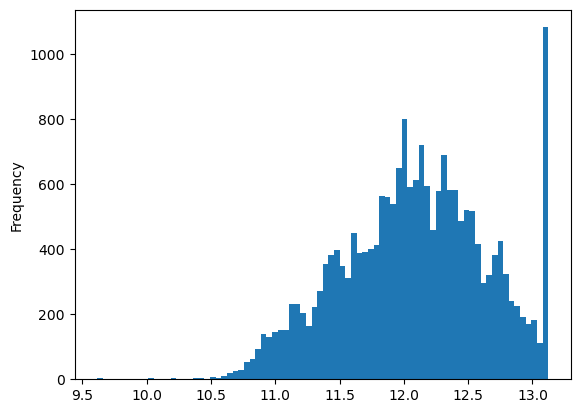

In [5]:
np.log1p(df.median_house_value).plot.hist(bins=80);

In [6]:
df.drop('ocean_proximity', axis=1, inplace=True)

## Question 1
Find a feature with missing values. How many missing values does it have?

In [7]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

## Question 2
What's the median (50% percentile) for variable 'population'?

In [8]:
df.population.median()

1166.0

## Split the data
- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [9]:
X = df.drop('median_house_value', axis=1)
y = df.median_house_value.copy()

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_vt, y_train, y_vt = train_test_split(X, y, random_state=42, train_size=0.6)
X_valid, X_test, y_valid, y_test = train_test_split(X_vt, y_vt, random_state=42, train_size=0.5)

In [11]:
y_train, y_valid, y_test = np.log1p(y_train), np.log1p(y_valid), np.log1p(y_test)

## Question 3
- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

reg = LinearRegression()
imputation = SimpleImputer(missing_values=np.nan)
pipe = Pipeline(steps=[('imputation', imputation), ('regressor', reg)])

params = {'imputation__strategy': ['constant' ,'mean'], 'imputation__fill_value': [0, None]}
cv = GridSearchCV(pipe, param_grid=params, scoring='neg_root_mean_squared_error')

cv.fit(X_train, y_train)



y_pred = cv.predict(X_valid)


rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
round(rmse_valid, 2)

print(cv.cv_results_)

{'mean_fit_time': array([0.02229171, 0.00978003, 0.00929489, 0.00946712]), 'std_fit_time': array([0.00736728, 0.00196942, 0.00183026, 0.00153093]), 'mean_score_time': array([0.00447378, 0.00301614, 0.00247283, 0.0028275 ]), 'std_score_time': array([0.00138902, 0.00109276, 0.00059115, 0.0010021 ]), 'param_imputation__fill_value': masked_array(data=[0, 0, None, None],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'param_imputation__strategy': masked_array(data=['constant', 'mean', 'constant', 'mean'],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'imputation__fill_value': 0, 'imputation__strategy': 'constant'}, {'imputation__fill_value': 0, 'imputation__strategy': 'mean'}, {'imputation__fill_value': None, 'imputation__strategy': 'constant'}, {'imputation__fill_value': None, 'imputation__strategy': 'mean'}], 'split0_test_score': array([-0.32686645, -0.32686645, -0.32686645, 

In [62]:
cv.cv_results_['mean_test_score']

array([-0.33874613, -0.33874613, -0.33874613, -0.33874613])

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
imputation = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
pipe = Pipeline(steps=[('imputation', imputation), ('regressor', reg)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)

rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
round(rmse_valid, 2)

0.35

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
imputation = SimpleImputer(missing_values=np.nan, strategy='mean')
pipe = Pipeline(steps=[('imputation', imputation), ('regressor', reg)])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)

rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
round(rmse_valid, 2)

0.35

## Question 4
- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

reg = Ridge()
imputation = SimpleImputer(missing_values=np.nan, strategy='mean',fill_value=None)
pipe = Pipeline(steps=[('imputation', imputation), ('regressor', reg)])

params = {'regressor__alpha': [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}
cv = GridSearchCV(pipe, param_grid=params, scoring='neg_root_mean_squared_error')

cv.fit(X_train, y_train)



y_pred = cv.predict(X_valid)


rmse_valid = mean_squared_error(y_valid, y_pred, squared=False)
print(round(rmse_valid, 2))
print(cv.best_score_)
print(cv.cv_results_)

0.35
-0.33874576039863935
{'mean_fit_time': array([0.02616501, 0.01697893, 0.00776796, 0.0056375 , 0.00519762,
       0.0057796 , 0.00545888, 0.00587254, 0.00447164]), 'std_fit_time': array([0.00903707, 0.00935932, 0.00110052, 0.00112497, 0.00125808,
       0.00125026, 0.00090226, 0.00089344, 0.00018479]), 'mean_score_time': array([0.0026927 , 0.00463047, 0.00312357, 0.00169864, 0.00275445,
       0.00180683, 0.00177412, 0.00165677, 0.0020401 ]), 'std_score_time': array([1.84259405e-04, 4.14240928e-03, 1.01107242e-03, 1.86110502e-04,
       1.74462129e-03, 4.30272910e-04, 3.65842054e-04, 6.66322561e-05,
       9.22063915e-04]), 'param_regressor__alpha': masked_array(data=[0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'regressor__alpha': 0}, {'regressor__alpha': 1e-06}, {'regressor__alpha': 0.0001}, {'regressor__alpha': 0.00

In [80]:
cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_regressor__alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

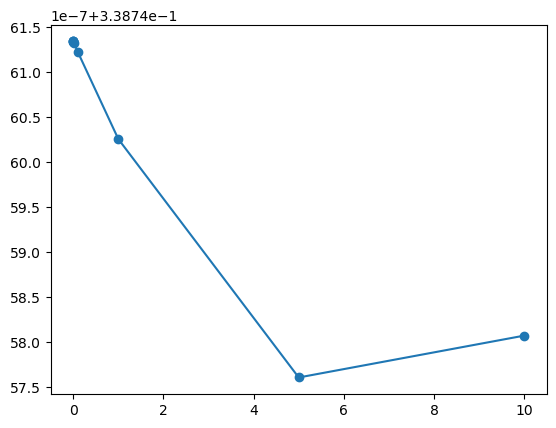

In [98]:
plt.plot(cv.cv_results_['param_regressor__alpha'].data , 
cv.cv_results_['mean_test_score']*-1, marker='o');

In [95]:
cv.cv_results_['param_regressor__alpha'].data, cv.cv_results_['mean_test_score']

(array([0, 1e-06, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10], dtype=object),
 array([-0.33874613, -0.33874613, -0.33874613, -0.33874613, -0.33874613,
        -0.33874612, -0.33874603, -0.33874576, -0.33874581]))

In [ ]:
## Question 5

In [ ]:
## Question 6